# Import the necessary Libraries

In [4]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

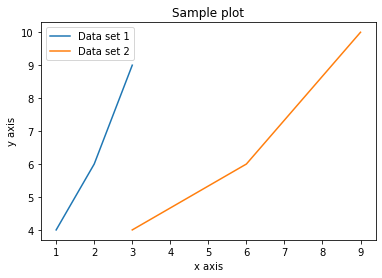

In [5]:
plt.plot([1,2,3],[4,6,9])
plt.plot([3,6,9],[4,6,10])
plt.title("Sample plot")
plt.legend(["Data set 1","Data set 2"])
plt.xlabel("x axis")
plt.ylabel("y axis")
plt.savefig("exported img")
plt.show()

In [6]:
dataframe = { "year":[ 2001, 2007, 2012],
       "attendees": [120, 130, 140],
       "avg_age": [21, 23, 25]}

In [7]:
df = pd.DataFrame(dataframe)

In [8]:
df

,year,attendees,avg_age
0,2001,120,21
1,2007,130,23
2,2012,140,25


In [9]:
earlier_than_2005 = df['year'] > 2005

In [10]:
df[earlier_than_2005]

,year,attendees,avg_age
1,2007,130,23
2,2012,140,25


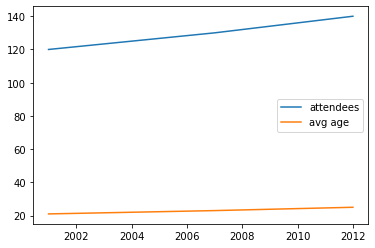

In [11]:
plt.plot(df['year'],df['attendees'])
plt.plot(df['year'],df['avg_age'])
plt.legend(["attendees","avg age"])
plt.show()

In [12]:
data = pd.read_csv('countries.csv')

# Head returns first 5 rows

In [13]:
data.head()

,country,continent,year,lifeExpectancy,population,gdpPerCapita
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [14]:
data.country

0       Afghanistan
1       Afghanistan
2       Afghanistan
3       Afghanistan
4       Afghanistan
           ...     
1699       Zimbabwe
1700       Zimbabwe
1701       Zimbabwe
1702       Zimbabwe
1703       Zimbabwe
Name: country, Length: 1704, dtype: object

In [15]:
afghanistan = data[data.country == "Afghanistan"]

In [16]:
set(data.continent)

{'Africa', 'Americas', 'Asia', 'Europe', 'Oceania'}

# filter 2007 data

In [17]:
data_07 = data[data.year == 2007]

In [18]:
asia_07 =  data_07[data_07.continent == "Asia"]

In [19]:
europe_07 = data_07[data_07.continent == "Europe"]

In [20]:
print(len(set(europe_07.country)))
print(len(set(asia_07.country)))

30
33


# Working with histograms

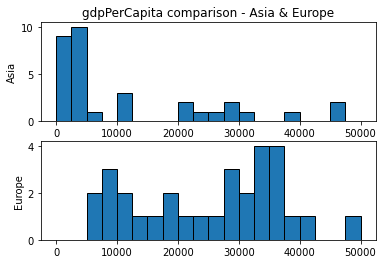

In [21]:
plt.subplot(2,1,1)
plt.title("gdpPerCapita comparison - Asia & Europe")
plt.hist(asia_07.gdpPerCapita, 20,range=(0, 50000) , edgecolor = 'black')
plt.ylabel("Asia")
plt.subplot(2,1,2)
plt.hist(europe_07.gdpPerCapita, 20, range = (0, 50000) , edgecolor = 'black')
plt.ylabel("Europe")
plt.show()

# Problem One

# LifeExpectancy Europe & America Comparison in 1997

In [22]:
data_97 = data[data.year == 1997]

In [23]:
europe_97 = data_97[data_97.continent == "Europe"]

In [24]:
america_97 = data_97[data_97.continent == "Americas"]

# check the length of countries data set in each continent

In [25]:
print(len(set(europe_97.country)))
print(len(set(america_97.country)))

30
25


# check mean & median lifeExpectancy of each continent

In [26]:
print("Europe 1997 lifeExpectancy Mean")
print(europe_97.lifeExpectancy.mean())
print("Europe 1997 lifeExpectancy Median")
print(europe_97.lifeExpectancy.median())
print("America 1997 lifeExpectancy Mean")
print(america_97.lifeExpectancy.mean())
print("America 1997 lifeExpectancy Median")
print(america_97.lifeExpectancy.median())

Europe 1997 lifeExpectancy Mean
75.50516666666667
Europe 1997 lifeExpectancy Median
76.116
America 1997 lifeExpectancy Mean
71.15048
America 1997 lifeExpectancy Median
72.146


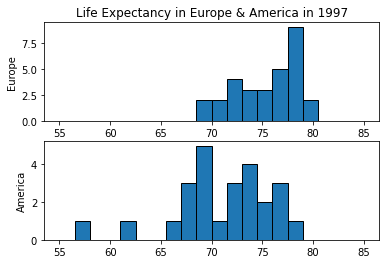

In [27]:
bins = 20
plt.subplot(2,1,1)
plt.title("Life Expectancy in Europe & America in 1997")
plt.hist(europe_97.lifeExpectancy, bins, range = (55, 85), edgecolor = 'black')
plt.ylabel("Europe")
plt.subplot(2,1,2)
plt.hist(america_97.lifeExpectancy, bins, range = (55, 85), edgecolor = 'black')
plt.ylabel("America")
plt.show()

# filter countries in america with lifeExpectancy of less than 65

In [28]:
america_97[america_97.lifeExpectancy < 65]

,country,continent,year,lifeExpectancy,population,gdpPerCapita
141,Bolivia,Americas,1997,62.050,7693188,3326.143191
645,Haiti,Americas,1997,56.671,6913545,1341.726931


# Time Series with Line Charts

# gdpPerCapita growth of us and china

In [29]:
us = data[data.country == "United States"]
china = data[data.country == "China"]

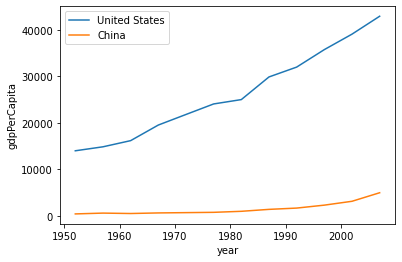

In [30]:
plt.plot(us.year, us.gdpPerCapita)
plt.plot(china.year , china.gdpPerCapita)
plt.legend(["United States", "China"])
plt.xlabel('year')
plt.ylabel('gdpPerCapita')
plt.show()

In [31]:
us_growth = us.gdpPerCapita / us.gdpPerCapita.iloc[0] * 100

In [32]:
china_growth = china.gdpPerCapita / china.gdpPerCapita.iloc[0] * 100

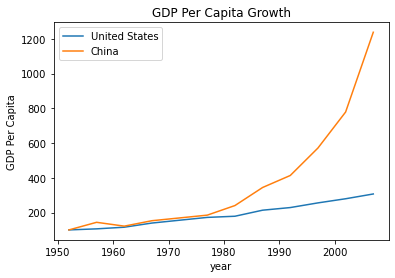

In [33]:
plt.plot(us.year, us_growth)
plt.plot(china.year, china_growth)
plt.title("GDP Per Capita Growth")
plt.legend(["United States", "China"])
plt.xlabel("year")
plt.ylabel("GDP Per Capita")
plt.show()

# Problem 2
# Compare population growth in US and China

In [34]:
utd_states = data[data.country == "United States"]
chna = data[data.country == "China"]

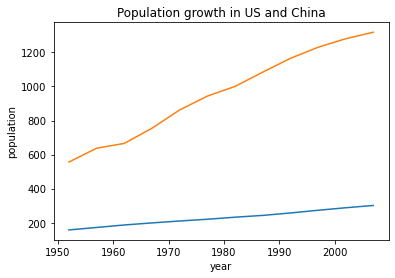

In [35]:
plt.plot(utd_states.year, utd_states.population / 10 ** 6)
plt.plot(chna.year, chna.population / 10 ** 6)
plt.title("Population growth in US and China")
plt.xlabel("year")
plt.ylabel("population")
plt.show()

# population growth in absolute terms

In [36]:
utd_states_growth = utd_states.population / utd_states.population.iloc[0] * 100
chna_growth = chna.population / chna.population.iloc[0] * 100

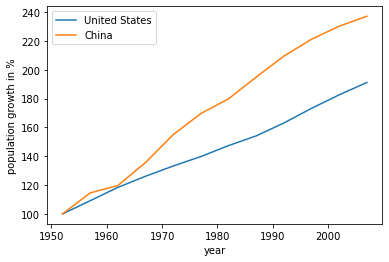

In [37]:
plt.plot(us.year, utd_states_growth)
plt.plot(chna.year, chna_growth)
plt.legend(["United States", "China"])
plt.xlabel("year")
plt.ylabel("population growth in %")
plt.show()

# Examining Data Relationships with Scatter Plots

# Problem

# Find how GDP Per Capita relates to lifeExpectancy

In [38]:
data_2007 = data[data.year == 2007]

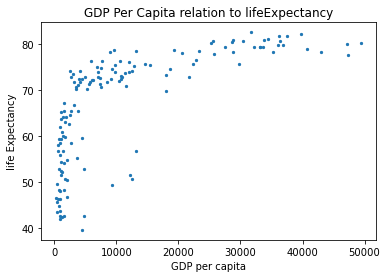

In [39]:
plt.scatter(data_2007.gdpPerCapita, data_2007.lifeExpectancy, 5)
plt.title("GDP Per Capita relation to lifeExpectancy")
plt.xlabel("GDP per capita")
plt.ylabel("life Expectancy")
plt.show()

# Correlation btw GDP Per Capita & Life Expectancy

In [40]:
data_2007.gdpPerCapita.corr(data_2007.lifeExpectancy)

0.6786623986777587

In [41]:
np.log10((10,100,1000))

array([1., 2., 3.])

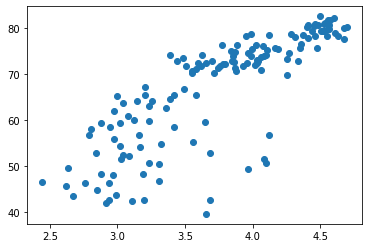

In [42]:
plt.scatter(np.log10(data_2007.gdpPerCapita),data_2007.lifeExpectancy)
plt.show()

In [43]:
set(data.year)

{1952, 1957, 1962, 1967, 1972, 1977, 1982, 1987, 1992, 1997, 2002, 2007}

In [44]:
years_sorted = sorted(set(data.year))

In [45]:
for given_year in years_sorted:
    data_year = data[data.year == given_year]
    plt.scatter(data_year.gdpPerCapita, data_year.lifeExpectancy, 5)
    plt.title(given_year)
    plt.xlim(0, 60000)
    plt.ylim(25,85)
    plt.xlabel("GDP Per Capita")
    plt.ylabel("Life Expectancy")
    # plt.show()
    plt.savefig(str(given_year),dpi=200) # dots per inch
    plt.clf() # clears the current plot

<Figure size 432x288 with 0 Axes>

In [46]:
data[data.gdpPerCapita > 60000]

,country,continent,year,lifeExpectancy,population,gdpPerCapita
852,Kuwait,Asia,1952,55.565,160000,108382.35290
853,Kuwait,Asia,1957,58.033,212846,113523.13290
854,Kuwait,Asia,1962,60.470,358266,95458.11176
855,Kuwait,Asia,1967,64.624,575003,80894.88326
856,Kuwait,Asia,1972,67.712,841934,109347.86700


In [47]:
for given_year in years_sorted:
    data_year = data[data.year == given_year]
    plt.scatter(np.log10(data_year.gdpPerCapita), data_year.lifeExpectancy, 5)
    plt.title(given_year)
    plt.xlim(2,5)
    plt.ylim(25,85)
    plt.xlabel("GDP Per Capita")
    plt.ylabel("Life Expectancy")
    # plt.show()
    plt.savefig("log_" + str(given_year),dpi=200) # dots per inch
    plt.clf() # clears the current plot

<Figure size 432x288 with 0 Axes>

# Problem Practice - Relationship btw GDP and Population

In [48]:
dat_2007 = data[data.year == 2007]

In [49]:
gdp_in_billions = (dat_2007.population * dat_2007.gdpPerCapita) / 10 ** 9

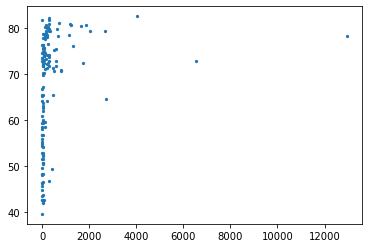

In [50]:
plt.scatter(gdp_in_billions,dat_2007.lifeExpectancy, 5)
plt.show()

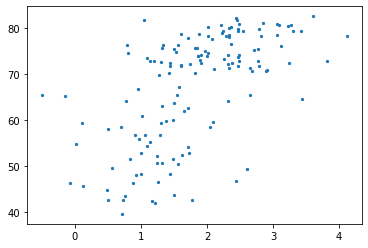

In [51]:
plt.scatter(np.log10(gdp_in_billions), dat_2007.lifeExpectancy, 5)
plt.show()

# COMPARING DATA WITH BAR GRAPHS

In [52]:
data_bar_2007 = data[data.year == 2007]

# Perfom data Sorting using sort fun

In [53]:
top_10 = data_bar_2007.sort_values('population', ascending = False).head(10)

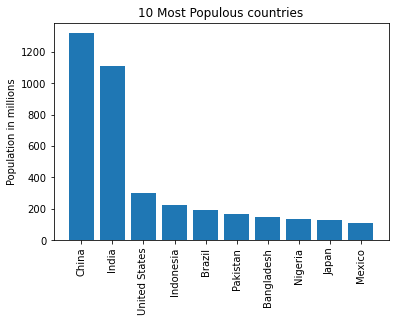

In [54]:
x = range(10)
plt.bar(x, top_10.population / 10 ** 6)
plt.xticks(x,top_10.country,rotation='vertical')
plt.title("10 Most Populous countries")
plt.ylabel('Population in millions')
plt.show()

# Compare the GDP of the most populous countries in 2007

In [55]:
data_for_2007 = data[data.year == 2007]

In [56]:
top10 = data_for_2007.sort_values('population', ascending=False).head(10)

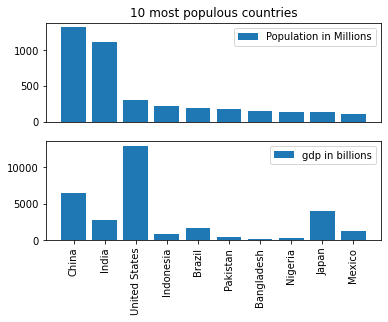

In [64]:
plt.subplot(2,1,1)
x  = range(10)
plt.bar(x, top10.population / 10 ** 6)
plt.xticks([],[])
plt.title("10 most populous countries")
plt.legend(["Population in Millions"])

plt.subplot(2,1,2)
plt.bar(x,top10.gdpPerCapita * top10.population / 10 ** 9)
plt.xticks(x, top10.country, rotation = "vertical")
plt.legend(["gdp in billions"])
plt.show()

# Data Aggregation